In [14]:
#EJERCICIO 1
# cargar librerias-----------------------------------------------
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# cargar base----------------------------------------------------
# x contiene las horas de trabajo realidas. x contiene el retorno económico / ganancias
rls_ex1 = pd.read_csv("Ejercicios_resueltos_Tema4_rls_ex1.csv")

# ver datos-------------------------------------------------
rls_ex1

,x,y
0,62.675661,517.097007
1,166.254106,1071.822371
2,122.397254,501.610387
3,38.997767,159.227305
4,48.466506,159.289701
5,75.726504,167.745255
6,115.779915,603.760399
7,48.359412,151.642354
8,220.862737,727.021883
9,27.618049,89.704189


In [15]:
# describir estadísticos -------------------------------------------------
rls_ex1.describe()

,x,y
count,34.000000,34.000000
mean,86.478831,523.345975
std,60.683849,443.033484
min,11.761794,89.704189
25%,48.386186,177.947704
50%,73.586046,367.889547
75%,114.434185,793.047566
max,243.544835,1833.782283


In [17]:
# información de tipos de variables
rls_ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       34 non-null     float64
 1   y       34 non-null     float64
dtypes: float64(2)
memory usage: 676.0 bytes


In [18]:
# describir base (cinco primeros)
rls_ex1.head()

,x,y
0,62.675661,517.097007
1,166.254106,1071.822371
2,122.397254,501.610387
3,38.997767,159.227305
4,48.466506,159.289701


In [20]:
# describir base (cinco últimos)
rls_ex1.tail()

,x,y
29,66.800425,401.340459
30,87.552780,887.265469
31,82.349913,143.480804
32,35.006632,250.206862
33,79.267578,149.481333


In [21]:
# nulos
rls_ex1.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [22]:
# nulos sumados
rls_ex1.isnull().sum()

x    0
y    0
dtype: int64

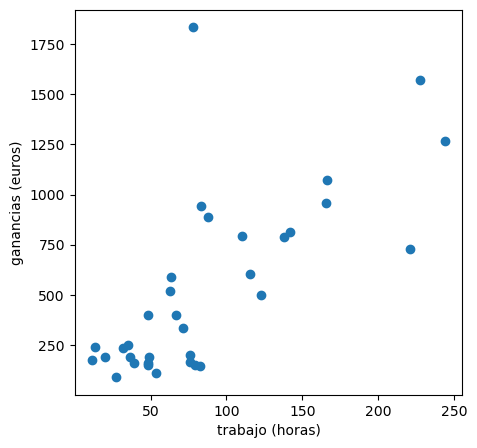

In [23]:
# pintar x e y---------------------------------------------------
fig = plt.figure(figsize=(5,5))
plt.scatter(rls_ex1.x, rls_ex1.y)
# definir ejes---------------------------------------------------
plt.xlabel("trabajo (horas)")
plt.ylabel("ganancias (euros)")
# mostrar grafico------------------------------------------------
plt.show()

In [24]:
# extraer variables y convertir en np.array----------------------
x = rls_ex1["x"].values.reshape(-1,1)
# x.shape
y = rls_ex1["y"].values.reshape(-1,1)
# y.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)
# se pueden obtener los coeficientes-----------------------------

LinearRegression()

In [25]:
print("Beta1: ", lm1.coef_)
# Este es el valor donde corta el eje Y (en X=0)

Beta1:  [[5.1591244]]


In [26]:
print("Beta0: ", lm1.intercept_)

Beta0:  [77.19092689]


In [33]:
print("Por lo tanto, el modelo de regresión lineal obtenido es:")
print("Y = ", lm1.intercept_, " + ", lm1.coef_, " · X")

Por lo tanto, el modelo de regresión lineal obtenido es:
Y =  [77.19092689]  +  [[5.1591244]]  · X


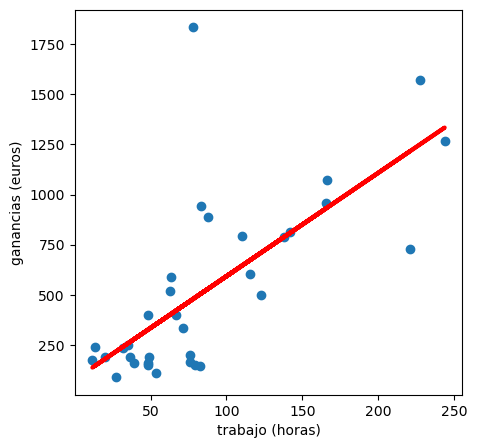

In [34]:
# obtener valores modelo-----------------------------------------
# pintar x e y---------------------------------------------------
fig = plt.figure(figsize=(5,5))
plt.scatter(rls_ex1.x, rls_ex1.y)
# pintar recta de regresion--------------------------------------
y_pred = lm1.predict(x)

plt.plot(rls_ex1.x, y_pred, color='red', linewidth=3)

# definir ejes---------------------------------------------------
plt.xlabel("trabajo (horas)")
plt.ylabel("ganancias (euros)")
# mostrar grafico------------------------------------------------
plt.show()

In [35]:
# extraer R2-----------------------------------------------------
print("Coeficiente de det. R2: %.2f"
% r2_score(y, y_pred))

Coeficiente de det. R2: 0.50


In [36]:
# calcular sigma2------------------------------------------------
print("Varianza del modelo, s2: %.2f"
% mean_squared_error(y, y_pred))
# estimador de la varianza por MLE

Varianza del modelo, s2: 95372.31


In [37]:
y_resta = (y - y_pred) ** 2
sum(y_resta)/34
# estimador de la varianza por OLS

array([95372.31261032])

In [38]:
y_resta = (y - y_pred) ** 2
sum(y_resta)/32

array([101333.08214846])

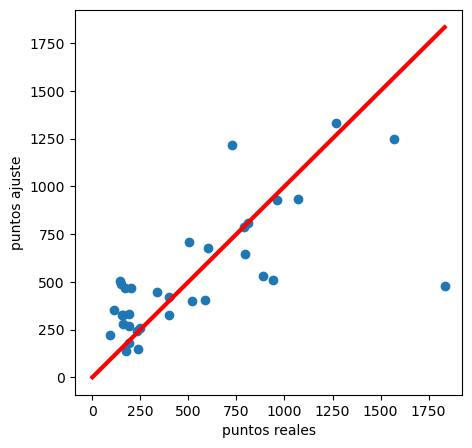

In [40]:
# pintar reales vs predichos
fig = plt.figure(figsize=(5,5))
plt.scatter(y, y_pred)
plt.xlabel("puntos reales")
plt.ylabel("puntos ajuste")
plt.plot([0, max(rls_ex1.y)], [0, max(rls_ex1.y)], color = 'red', linewidth = 3)
plt.show()

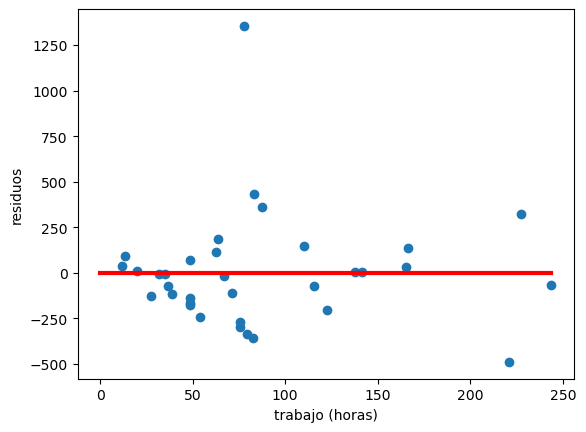

In [42]:
# obtener residuos-----------------------------------------------
residuos1 = y - y_pred
plt.scatter(x, residuos1)
plt.xlabel("trabajo (horas)")
plt.ylabel("residuos")
plt.plot([0, max(rls_ex1.x)], [0, 0], color = 'red', linewidth = 3)
plt.show()

In [45]:
# se realiza la prueba s-w---------------------------------------
sh_result = stats.shapiro(residuos1)
# dar formato a la salida----------------------------------------
print("Test Shapiro-Wilk, p.valor: %5.5f" %(sh_result.pvalue))
print("Como p-valor < 0.05, se rechaza la hipótesis nula y no se da normalidad en los residuos.")

Test Shapiro-Wilk, p.valor: 0.00002
Como p-valor < 0.05, se rechaza la hipótesis nula y no se da normalidad en los residuos.


In [46]:
m1 = sm.OLS(y, sm.add_constant(x)).fit()
bp1 = sms.het_breuschpagan(resid = m1.resid, exog_het = m1.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f" %(bp1))
print("Como p-valor > 0.05, no se rechaza la hipótesis nula y se da homocedasticidad.")

El resultado del test Breusch-Pagan es: p.valor = 0.834
Como p-valor > 0.05, no se rechaza la hipótesis nula y se da homocedasticidad.
